<a href="https://colab.research.google.com/github/Jumas-Cola/Neural_Networks_and_CV/blob/master/PyTorch_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import torch

matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

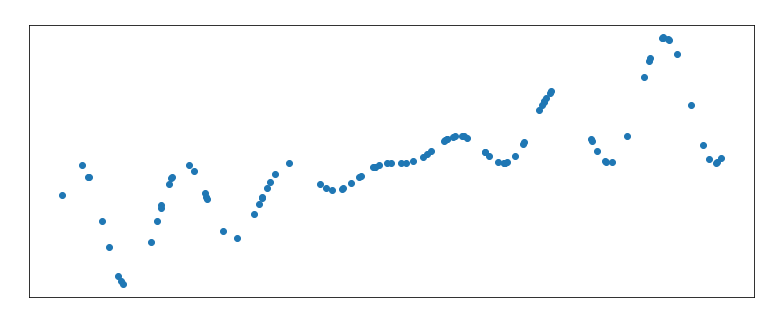

In [0]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

def func(x):
  return torch.sin(x)**2 * x

y_train = func(x_train)

plt.tick_params(axis='x', colors='w')
plt.tick_params(axis='y', colors='w')
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = f(x)$', c='w');

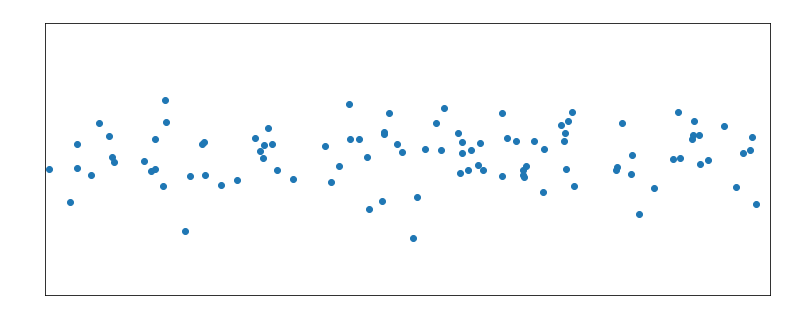

In [0]:
noise = torch.randn(y_train.shape) / 5.

plt.tick_params(axis='x', colors='w')
plt.tick_params(axis='y', colors='w')
plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise', c='w');

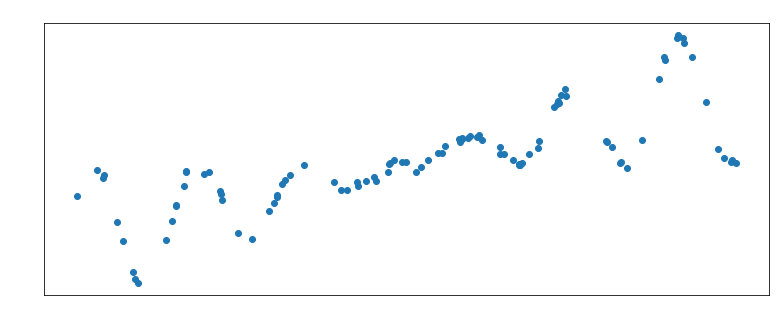

In [0]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy f(x)', c='w')
plt.xlabel('x_train', c='w')
plt.ylabel('y_train', c='w')
plt.tick_params(axis='x', colors='w')
plt.tick_params(axis='y', colors='w');

In [0]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [0]:
tmp = torch.Tensor([1, 2, 3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

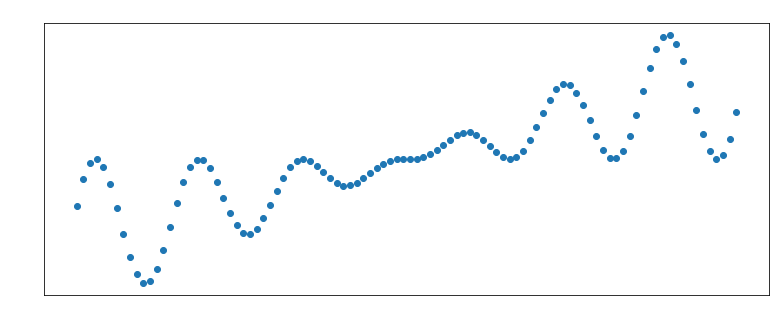

In [0]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = func(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('f(x)', c='w')
plt.tick_params(axis='x', colors='w')
plt.tick_params(axis='y', colors='w')
plt.xlabel('x_validation', c='w')
plt.ylabel('y_validation', c='w');

In [0]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [0]:
class FuncNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super().__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.act2 = torch.nn.Tanh()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)
  
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x

func_net = FuncNet(50)

# Prediction

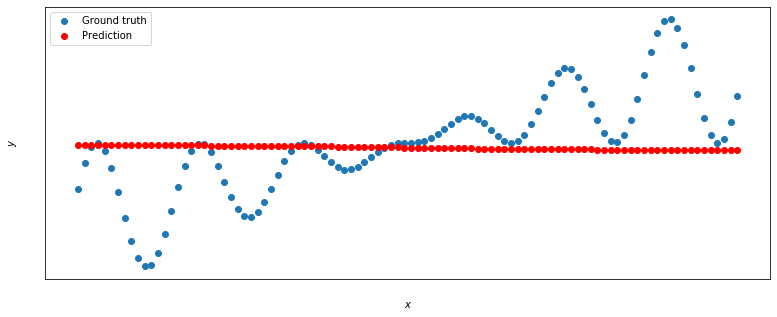

In [0]:
def predict(net, x, y):
  y_pred = net.forward(x)

  plt.plot(x.numpy(), y.numpy(), 'o', label='Ground truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction')
  plt.legend(loc='upper left')
  plt.tick_params(axis='x', colors='w')
  plt.tick_params(axis='y', colors='w')
  plt.xlabel('$x$')
  plt.ylabel('$y$')

predict(func_net, x_validation, y_validation)

# Optimizer

In [0]:
optimizer = torch.optim.Adam(func_net.parameters(), lr=0.01)

# Loss function

In [0]:
def loss(pred, target):
  squares = (pred - target) ** 2
  return squares.mean()

# Training

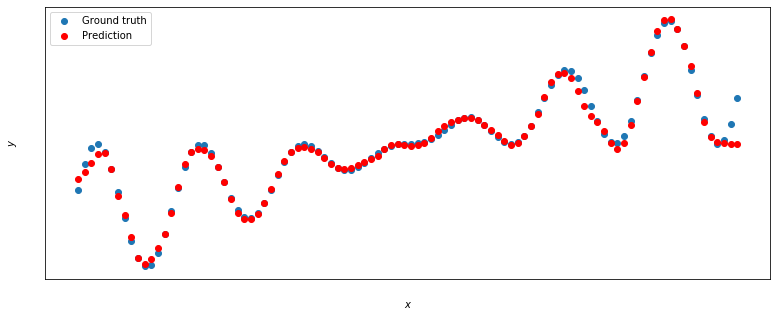

In [0]:

for epoch_index in range(2000):
  optimizer.zero_grad()

  y_pred = func_net.forward(x_train)
  loss_val = loss(y_pred, y_train)

  loss_val.backward()

  optimizer.step()

predict(func_net, x_validation, y_validation)

  # plt.text(0.8, 0.1, 'Epoch: {}'.format(epoch_index), horizontalalignment='center',
  #      verticalalignment='center', transform=ax.transAxes)
  # plt.pause(0.001)
  # plt.clf();